In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [6]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
df.corr()

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


In [8]:
df.shape

(60552, 31)

In [9]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [10]:
df=df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1) 
#Gereksiz sütunları çıkarıyoruz.

In [11]:
df=df.drop_duplicates()[:9514]

In [12]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [13]:
df.drop(['religion','sex','ethnicity','pets','sign'],axis=1,inplace=True) 
#Bu sütunların yaş tahmini için gerekli olmadığını düsünüyorum

In [14]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [15]:
df['body_type']=df['body_type'].map({'fit':'sporty',
                                     'athletic':'sporty',
                                     'thin':'sporty',
                                     'skinny':'sporty',
                                    'average':'average',
                                    'curvy':'curvy', 
                                     'a little extra':'curvy',
                                     'full figured':'curvy',
                                    'overweight':'bad',
                                     'jacked':'bad',
                                     'used up':'bad',
                                     'rather not say':'bad'})

In [16]:
df['body_type'].unique()

array(['curvy', 'average', 'sporty', nan, 'bad'], dtype=object)

In [17]:
#pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


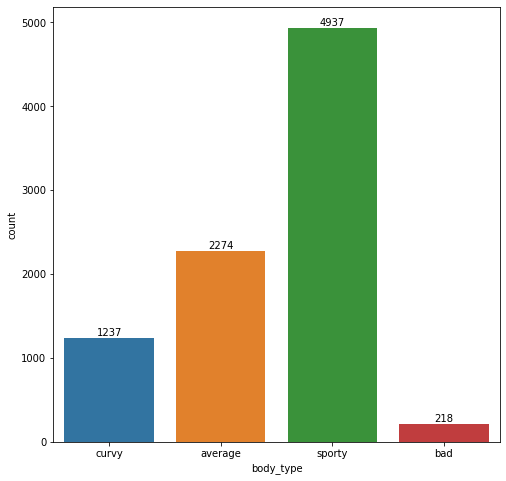

In [18]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["body_type"]);
ax.bar_label(ax.containers[0]);

In [19]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [20]:
df['diet'].replace({'strictly ':'','mostly ':''},regex=True,inplace=True)

In [21]:
df['diet'].unique()

array(['anything', 'other', 'vegetarian', nan, 'vegan', 'halal', 'kosher'],
      dtype=object)

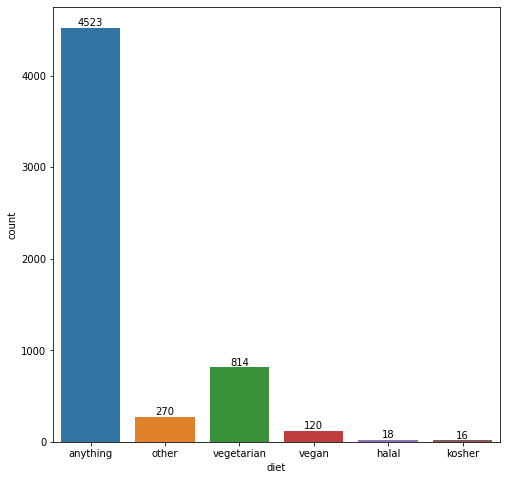

In [22]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["diet"]);
ax.bar_label(ax.containers[0]);

In [23]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [24]:
df['drinks'] = df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})

In [25]:
df['drinks'].unique()

array([ 2.,  3.,  0.,  1., nan,  4.,  5.])

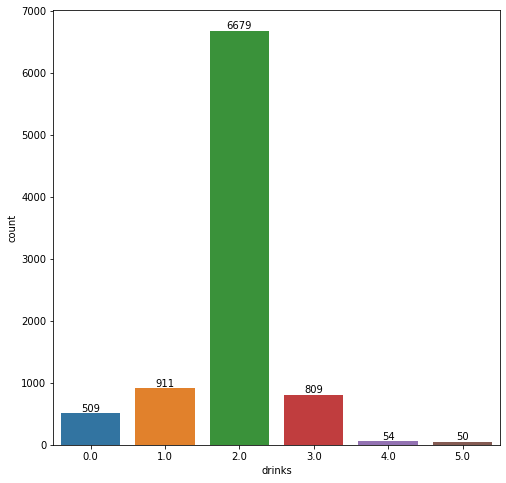

In [26]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["drinks"]);
ax.bar_label(ax.containers[0]);

In [27]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [28]:
df['drugs'] = df["drugs"].map({"never":0, "sometimes":1, "often":2})

In [29]:
df['drugs'].unique()

array([ 0.,  1., nan,  2.])

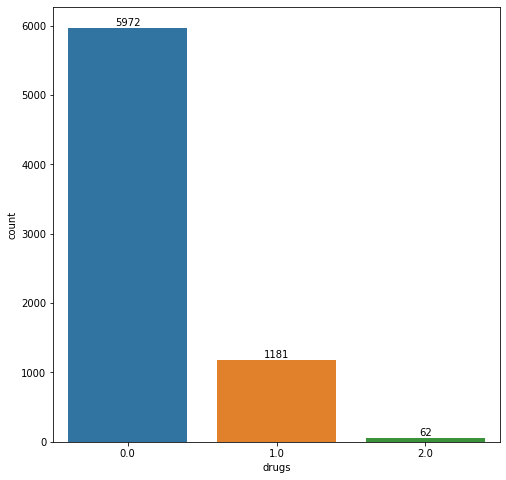

In [30]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["drugs"]);
ax.bar_label(ax.containers[0]);

In [31]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

In [32]:
df['education'].replace({'working':'student','graduated from':'graduated','dropped out':'dropped'},inplace=True)

In [33]:
df['education'] = df['education'].str.split().str[0]

In [34]:
df['education'].unique()

array(['working', 'graduated', nan, 'college/university', 'dropped',
       'two-year', 'space', 'masters', 'high', 'law', 'ph.d'],
      dtype=object)

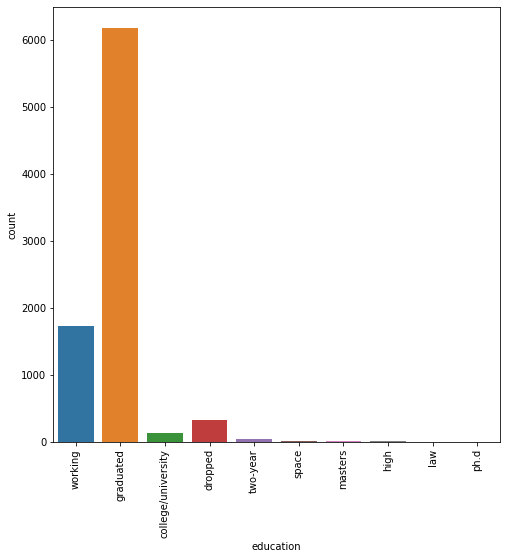

In [35]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["education"]);
plt.xticks(rotation=90);

In [36]:
df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

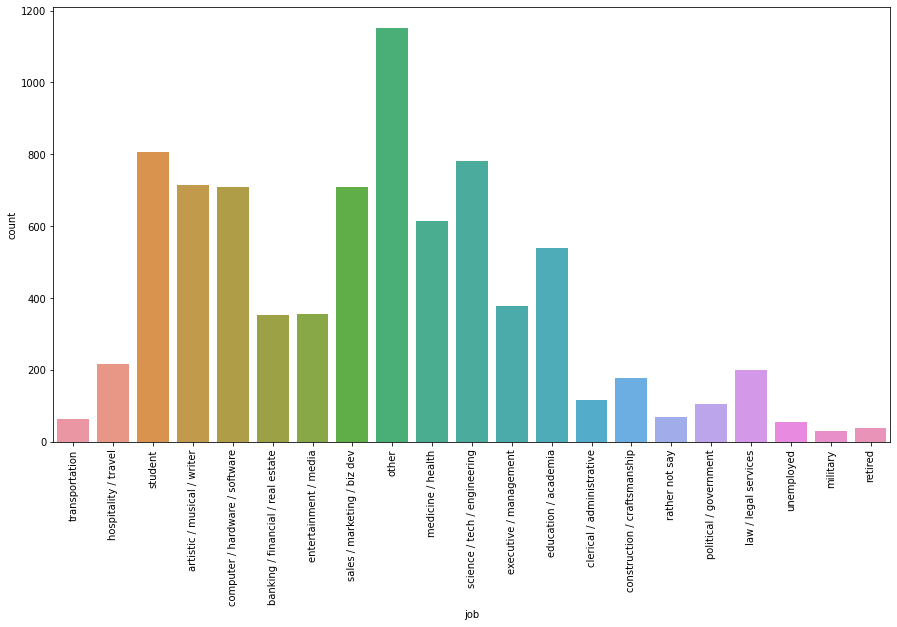

In [37]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=df["job"]);
plt.xticks(rotation=90);

In [38]:
df['last_online'].unique()

array(['2012-06-28-20-30', '2012-06-29-21-41', '2012-06-27-09-10', ...,
       '2012-04-28-12-42', '2012-03-01-15-17', '2012-06-14-15-14'],
      dtype=object)

In [39]:
df['last_online']=df['last_online'].str.split('-').str[0]

In [40]:
df['last_online']=df['last_online'].fillna(df['last_online'].median())

In [41]:
df['last_online']=df['last_online'].astype("int")

In [42]:
df['last_online'].unique()

array([2012, 2011])

In [43]:
df['location'].unique()

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

<AxesSubplot:>

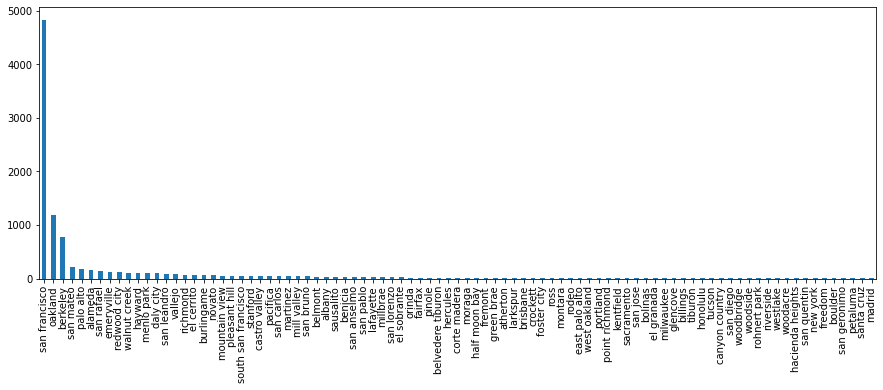

In [44]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
df.location.value_counts().plot.bar()

In [45]:
df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [46]:
df.offspring = df.offspring.map({"doesn’t have kids":"no",
                                 "doesn’t have kids, but might want them":"want",
                                 "doesn’t have kids, but wants them":"want",
                                 "doesn’t want kids":"want",
                                 "has a kid":"no",
                                 "has kids":"no",
                                 "doesn’t have kids, and doesn’t want any":"no",
                                 "has kids, but doesn’t want more":"no",
                                 "has a kid, but doesn’t want more":"no",
                                 "has a kid, and might want more":"want",
                                 "wants kids":"want",
                                 "might want kids":"want",
                                 "has kids, and might want more":"want",
                                 "has a kid, and wants more":"want",
                                 "has kids, and wants more":"want"
                                })

In [47]:
df.offspring.unique()

array([nan, 'want', 'no'], dtype=object)

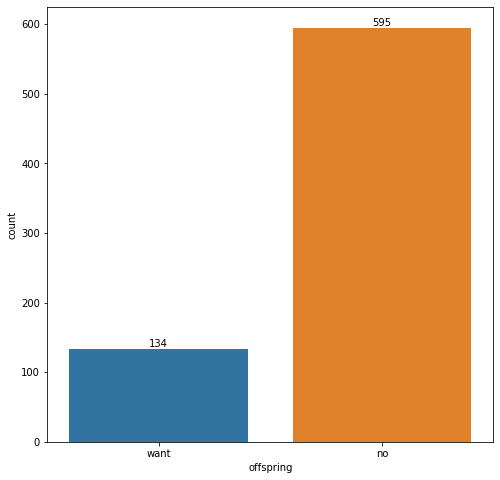

In [48]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["offspring"]);
ax.bar_label(ax.containers[0]);

In [49]:
df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

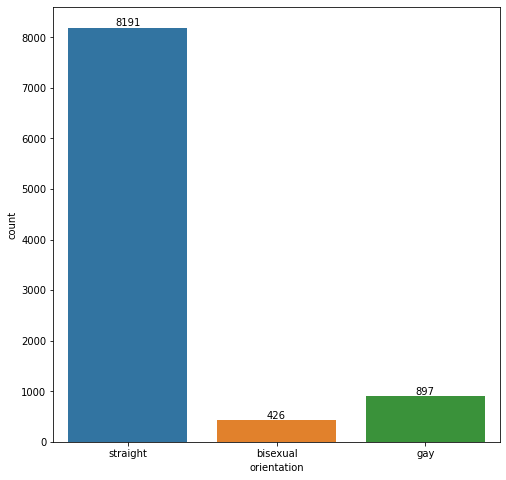

In [50]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["orientation"]);
ax.bar_label(ax.containers[0]);

In [51]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [52]:
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

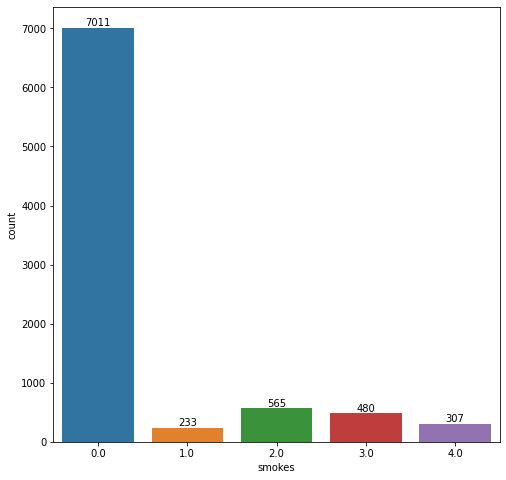

In [53]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["smokes"]);
ax.bar_label(ax.containers[0]);

In [54]:
df['speaks'].unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), french (okay), spanish (poorly), sign language (poorly)',
       'english (fluently), spanish, swedish',
       'english (fluently), french (okay), swedish (poorly)'],
      dtype=object)

In [55]:
df['speaks']=df['speaks'].astype('category')
df['languages']=df['speaks'].apply(lambda x:len(list(x.split(','))))

In [56]:
df['languages'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan])

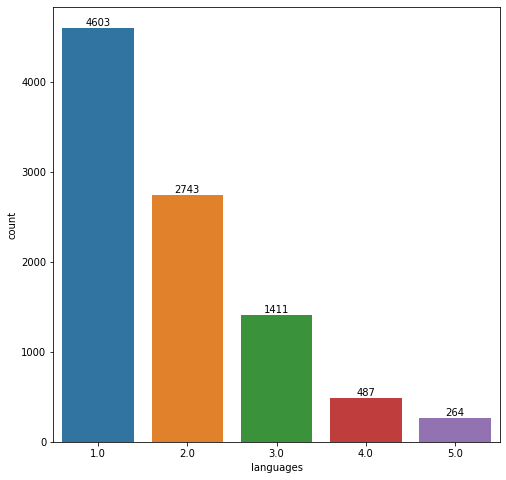

In [57]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["languages"]);
ax.bar_label(ax.containers[0]);

In [58]:
df['status'].unique()

array(['single', 'available', 'seeing someone', 'married'], dtype=object)

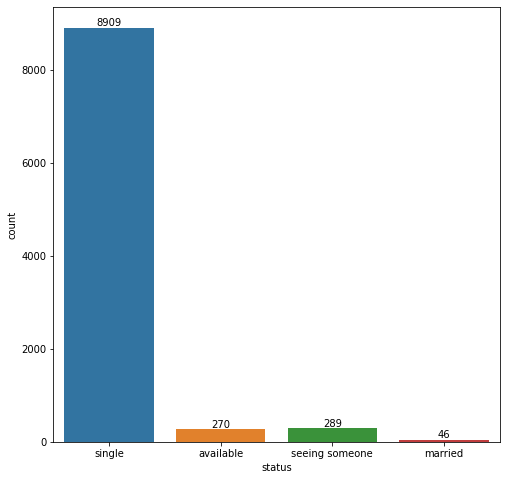

In [59]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["status"]);
ax.bar_label(ax.containers[0]);

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          9514 non-null   float64 
 1   body_type    8666 non-null   object  
 2   diet         5761 non-null   object  
 3   drinks       9012 non-null   float64 
 4   drugs        7215 non-null   float64 
 5   education    8459 non-null   object  
 6   height       9514 non-null   float64 
 7   income       9514 non-null   float64 
 8   job          8183 non-null   object  
 9   last_online  9514 non-null   int64   
 10  location     9514 non-null   object  
 11  offspring    729 non-null    object  
 12  orientation  9514 non-null   object  
 13  smokes       8596 non-null   float64 
 14  speaks       9508 non-null   category
 15  status       9514 non-null   object  
 16  languages    9508 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(8)
memory usage: 1.6+ MB


In [61]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,offspring,orientation,smokes,speaks,status,languages
0,22.0,curvy,anything,2.0,0.0,working,75.0,-1.0,transportation,2012,south san francisco,NaN,straight,2.0,english,single,1.0
1,35.0,average,other,3.0,1.0,working,70.0,80000.0,hospitality / travel,2012,oakland,NaN,straight,0.0,"english (fluently), spanish (poorly), french (...",single,3.0
2,38.0,sporty,anything,2.0,NaN,graduated,68.0,-1.0,NaN,2012,san francisco,NaN,straight,0.0,"english, french, c++",available,3.0
3,23.0,sporty,vegetarian,2.0,NaN,working,71.0,20000.0,student,2012,berkeley,NaN,straight,0.0,"english, german (poorly)",single,2.0
4,29.0,sporty,NaN,2.0,0.0,graduated,66.0,-1.0,artistic / musical / writer,2012,san francisco,NaN,straight,0.0,english,single,1.0


In [62]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
height            0
income            0
job            1331
last_online       0
location          0
offspring      8785
orientation       0
smokes          918
speaks            6
status            0
languages         6
dtype: int64

In [63]:
#Tüm number değerler ortalamalar ile dolduruldu
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True)

In [64]:
#Tüm object değerler en çok olan değer ile dolduruldu
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)

In [65]:
df.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
smokes         0
speaks         6
status         0
languages      0
dtype: int64

In [66]:
df['age']=df['age'].astype(int)

gen = []

# Millennial - 1
# Gen X-er - 2
# Boomers - 3

for i in df["age"].values:
    if (i>=18) and (i<=32):
        gen.append("Millennial")
    elif (i>=33) and (i<=47):
        gen.append("Gen X-er")
    elif (48>=33) and (i<=70):
        gen.append("Boomers")
    else:
        gen.append("Unkown")
df["gen"] = gen

<AxesSubplot:>

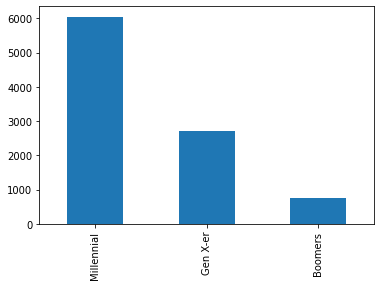

In [67]:
df["gen"].replace("Unkown","Boomers",regex=True,inplace=True)
df["gen"].value_counts().plot.bar()

In [68]:
df.sample(10)

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,offspring,orientation,smokes,speaks,status,languages,gen
7766,24,curvy,anything,1.0,0.0,graduated,68.0,-1.0,other,2012,vallejo,no,straight,0.0,"english (fluently), french (poorly)",single,2.0,Millennial
4995,31,sporty,anything,2.0,0.0,graduated,71.0,-1.0,science / tech / engineering,2012,mountain view,no,straight,0.0,"english, spanish (poorly)",single,2.0,Millennial
7192,35,sporty,anything,2.0,0.0,graduated,68.0,-1.0,artistic / musical / writer,2012,san francisco,no,straight,0.0,"english (fluently), french (poorly), russian (...",single,3.0,Gen X-er
2434,31,sporty,anything,2.0,1.0,graduated,74.0,-1.0,entertainment / media,2012,san francisco,no,straight,2.0,"english (fluently), russian (fluently), french...",single,3.0,Millennial
1291,29,sporty,anything,2.0,0.0,graduated,66.0,-1.0,computer / hardware / software,2012,san leandro,no,straight,0.0,"english (fluently), chinese (poorly)",single,2.0,Millennial
7347,29,sporty,anything,2.0,0.0,graduated,69.0,50000.0,sales / marketing / biz dev,2012,san francisco,no,straight,0.0,"english (fluently), arabic (fluently), spanish...",single,5.0,Millennial
4911,27,sporty,anything,2.0,0.0,graduated,69.0,-1.0,science / tech / engineering,2012,san francisco,no,straight,0.0,"english (fluently), chinese (okay)",single,2.0,Millennial
4766,28,curvy,other,1.0,1.0,graduated,63.0,-1.0,other,2011,san francisco,no,bisexual,0.0,"english (fluently), spanish (poorly), russian ...",single,3.0,Millennial
8486,24,average,anything,2.0,0.0,graduated,73.0,-1.0,student,2012,walnut creek,no,straight,2.0,english,single,1.0,Millennial
5609,29,sporty,anything,2.0,0.0,graduated,60.0,-1.0,other,2012,oakland,no,straight,0.0,english,single,1.0,Millennial


In [69]:
df.corr()

,age,drinks,drugs,height,income,last_online,smokes,languages
age,1.000000,-0.114700,-0.115619,-0.022078,0.011424,0.015792,-0.149530,-0.024326
drinks,-0.114700,1.000000,0.177768,0.036521,0.040990,-0.003259,0.130861,-0.009832
drugs,-0.115619,0.177768,1.000000,0.042675,0.068737,-0.015404,0.293364,0.007758
height,-0.022078,0.036521,0.042675,1.000000,0.073105,0.016633,0.033916,0.015972
income,0.011424,0.040990,0.068737,0.073105,1.000000,-0.009376,0.034490,0.063330
last_online,0.015792,-0.003259,-0.015404,0.016633,-0.009376,1.000000,-0.032069,0.035810
smokes,-0.149530,0.130861,0.293364,0.033916,0.034490,-0.032069,1.000000,-0.026991
languages,-0.024326,-0.009832,0.007758,0.015972,0.063330,0.035810,-0.026991,1.000000


In [70]:
df.describe()

,age,drinks,drugs,height,income,last_online,smokes,languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,1.909397,0.137166,68.337398,18887.145155,2011.922745,0.423691,1.850116
std,9.445488,0.675742,0.362490,3.905229,91428.807808,0.267009,1.026153,1.031628
min,18.000000,0.000000,0.000000,36.000000,-1.000000,2011.000000,0.000000,1.000000
25%,25.000000,2.000000,0.000000,66.000000,-1.000000,2012.000000,0.000000,1.000000
50%,30.000000,2.000000,0.000000,68.000000,-1.000000,2012.000000,0.000000,2.000000
75%,36.000000,2.000000,0.000000,71.000000,-1.000000,2012.000000,0.000000,2.000000
max,110.000000,5.000000,2.000000,95.000000,1000000.000000,2012.000000,4.000000,5.000000


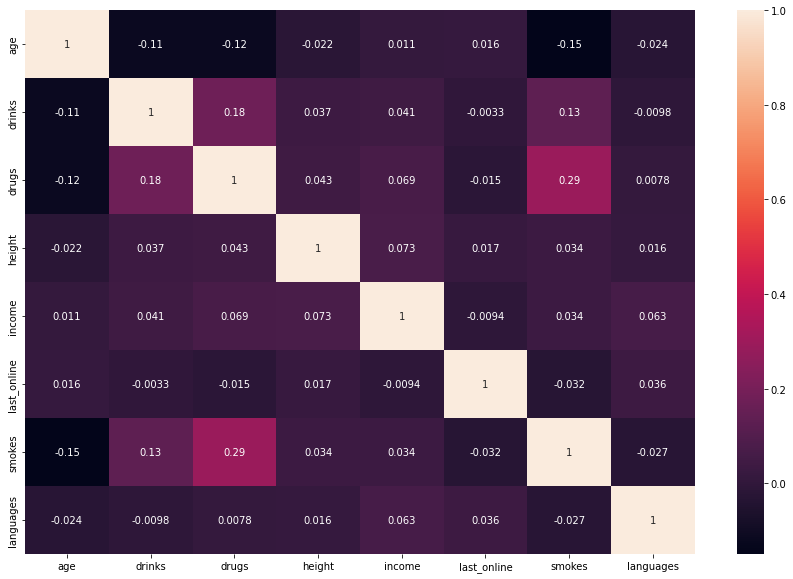

In [71]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

# Regression

In [72]:
df_reg=pd.get_dummies(df,drop_first=True)

In [73]:
df_reg.shape

(9514, 1934)

In [74]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [75]:
def regression(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [76]:
regression(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.855603,3.622643,2.946936
Ridge,0.845847,3.743017,3.011322
ExtraTreeRegressor,0.731605,4.938930,3.849909
LinearRegression,0.670085,5.475794,4.082284
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.467521,6.956603,4.584761
ElasticNet,0.310467,7.916325,5.421796


# Classification

In [77]:
!pip uninstall xgboost 

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (y/n)? ERROR: Operation cancelled by user


In [78]:
!pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
y=df[["gen"]]
df_class=df.drop(["gen","age"],axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
def classification(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [82]:
classification(x,y)

,accuracy_score
XGBClassifier,0.665791
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
BernoulliNB,0.637415
RandomForestClassifier,0.632685
KNeighborsClassifier,0.593799
DecisionTreeClassifier,0.547556
